## Use Selenium to Scrape Top Influencer User Id's

In [1]:
# # https://towardsdatascience.com/how-to-use-selenium-to-web-scrape-with-example-80f9b23a843a
# from selenium import webdriver
# # pip3 install chromedriver-binary
# import chromedriver_binary

In [2]:
# driver = webdriver.Chrome()

In [3]:
# driver.get('https://www.instagram.com/directory/profiles/')

In [4]:
# driver.find_element_by_xpath("""//*[@id="react-root"]/section/main/div/div[2]/div/ul[1]/li[1]/a""").click()

In [5]:
# driver.find_element_by_xpath("""//*[@id="react-root"]/section/main/div[1]/div[2]/div/ul[1]/li[1]/a""").click()

In [6]:
# posts = driver.find_elements_by_class_name('_7kTyW')

In [7]:
# user_ids = []
# for post in posts:
#     user_ids.append(post.text)

In [8]:
# driver.back()

In [9]:
# driver.find_element_by_xpath("""//*[@id="react-root"]/section/main/div/div[2]/div/ul[1]/li[2]/a""").click()

In [10]:
# posts = driver.find_elements_by_class_name('_7kTyW')

In [11]:
# for post in posts:
#     user_ids.append(post.text)

In [12]:
# len(user_ids)

In [13]:
# driver.back()

## Automate scrapping using loops to get user_id's

In [14]:
# from: https://www.instagram.com/directory/profiles/

In [15]:
# main_dir1 = [str(x) for x in range(1,5)]
# main_dir2 = [str(x) for x in range(1,26)]
# sub_dir1 = [str(x) for x in range(1,5)]
# sub_dir2 = [str(x) for x in range(1,4)]

In [16]:
# def main_dir_str(x, y):
#     """
#     Returns string for the argument in method driver.find_element_by_xpath()
    
#     Input: x, y strings for xpath locations on https://www.instagram.com/directory/profiles/
#     Output: string for xpath
#     """
#     return """//*[@id="react-root"]/section/main/div/div[2]/div/ul[""" + x + """]/li[""" + y + """]/a"""

# def sub_dir_str(x, y):
#     """
#     Returns string for the argument in method driver.find_element_by_xpath()
    
#     Input: x, y strings for xpath locations on https://www.instagram.com/directory/profiles/<sub dir #>/
#     Output: string for xpath
#     """
#     if x == '4':
#         return """//*[@id="react-root"]/section/main/div/div[2]/div/ul[4]/li/a"""
#     else:
#         return """//*[@id="react-root"]/section/main/div/div[2]/div/ul[""" + x + """]/li[""" + y + """]/a"""

In [17]:
# import random
# random.randint(6,10)/10

In [18]:
# import time
# import random
# user_ids = []
# for x_main in main_dir1:
#     for y_main in main_dir2:
#         driver.get('https://www.instagram.com/directory/profiles/')
#         driver.find_element_by_xpath(main_dir_str(x_main, y_main)).click()
#         for x_sub in sub_dir1:
#             for y_sub in sub_dir2:
#                 time.sleep(random.randint(6,10)/10)
#                 driver.find_element_by_xpath(sub_dir_str(x_sub, y_sub)).click()
#                 time.sleep(random.randint(6,10)/10)
#                 posts = driver.find_elements_by_class_name('_7kTyW')
#                 for post in posts:
#                     user_ids.append(post.text)
#                 driver.back()

In [19]:
# len(user_ids)

In [20]:
# unique, counts = np.unique(user_ids, return_counts = True)

In [21]:
# len(counts)

In [22]:
# len(unique)

In [23]:
# unique[1]

In [24]:
# user_ids[-1]

In [25]:
# type(unique)

## Save Unique User Id's as .csv

In [26]:
# from numpy import savetxt

In [27]:
# savetxt('user_ids.csv'
#         , unique
#         , delimiter = ','
#         , fmt = '%s'
#        )

## Load Unique User Id's

In [28]:
from numpy import loadtxt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [29]:
unique_ids = loadtxt('user_ids.csv'
                     , delimiter = '\n'
                     , dtype = str
                    )

In [30]:
type(unique_ids)

numpy.ndarray

In [31]:
len(unique_ids)

100000

## Data for Multiple Users

In [32]:
from instaloader import *
from instaloader import Instaloader as insta

In [33]:
# instaloader from https://instaloader.github.io/module/structures.html?highlight=get_followers#instaloader.Profile.get_followers

In [61]:
from itertools import islice
from math import ceil

PROFILE = 'CLAIRE_MOST' # profile to download from

profile = instaloader.Profile.from_username(bot.context, PROFILE)

X_percentage = 2 # percentage of posts that should be downloaded

post = profile.get_posts()

posts_sorted_by_likes = sorted(post,
                               key=lambda p: p.likes + p.comments,
                               reverse=True)
txt = []
for post in islice(posts_sorted_by_likes, ceil(profile.mediacount * X_percentage / 100)):
    for c in post.get_comments():
        txt.append(c.text)


HTTP redirect from https://www.instagram.com/graphql/query to https://www.instagram.com/accounts/login/


JSON Query to graphql/query: 429 Too Many Requests: redirected to login [retrying; skip with ^C]
Requests within last 10/11/20/22/30/60 minutes grouped by type:
                              other:    1    1    1    1    1    1
   472f257a40c653c64c666ce877d59d2b:   28   28   28   28   28   28
   2b0673e0dc4580674a88d426fe00ea90:    4    4    4    4    4    4
 * 97b41c52301f77ce508f55e66d17620e:    9    9    9    9    9    9
Instagram responded with HTTP error "429 - Too Many Requests". Please
do not run multiple instances of Instaloader in parallel or within
short sequence. Also, do not use any Instagram App while Instaloader
is running.
The request will be retried in 646 seconds, at 09:14.



HTTP redirect from https://www.instagram.com/graphql/query to https://www.instagram.com/accounts/login/


JSON Query to graphql/query: 429 Too Many Requests: redirected to login [retrying; skip with ^C]
Requests within last 10/11/20/22/30/60 minutes grouped by type:
                              other:    0    0    1    1    1    1
   472f257a40c653c64c666ce877d59d2b:    0    0   28   28   28   28
   2b0673e0dc4580674a88d426fe00ea90:    0    2    4    4    4    4
 * 97b41c52301f77ce508f55e66d17620e:    1    6   10   10   10   10
Instagram responded with HTTP error "429 - Too Many Requests". Please
do not run multiple instances of Instaloader in parallel or within
short sequence. Also, do not use any Instagram App while Instaloader
is running.
The request will be retried in 8 seconds, at 09:15.



HTTP redirect from https://www.instagram.com/graphql/query to https://www.instagram.com/accounts/login/


ConnectionException: JSON Query to graphql/query: 429 Too Many Requests: redirected to login

## Getting Comments, get a few potential users...

In [60]:
bot = instaloader.Instaloader()
# bot.login('user', 'pass')

In [57]:
txt[:10]

['shades😎',
 '😍😍',
 'MOOD 😍✨',
 'I love you',
 'So cute 💛',
 '🦋😍✨',
 'Mood',
 'She favors MC Lyte',
 '😍',
 'you’re everything wow 😩']

In [58]:
len(txt)

1896

In [34]:
def download_instaloader(lst):
    """
    Returns list of dictonaries of user profile information
    Input: lst, list of user id strings
    Output: lst, list of scrapped user id string
            lst_dict, list of scrapped user profile dictionary
    """
    import instaloader
    import time
    import random
    bot = instaloader.Instaloader()
    # for private profiles
    bot.login('user'
              , 'pass'
             )
    lst_dict = []
    name_lst = []
    for userid in lst:
        try:
            name_lst.append(userid)
            time.sleep(random.randint(3,9)/10)
            profile = Profile.from_username(bot.context, userid)
            lst_dict.append({'user_name': profile.username
                              , 'user_id': profile.userid
                              , 'private': profile.is_private
                              , 'followed': profile.followed_by_viewer
                              , 'post_count': profile.mediacount
                              , 'igtv_count': profile.igtvcount
                              , 'followers_count': profile.followers
                              , 'following_count': profile.followees
                              , 'external_url': profile.external_url
                              , 'business_acct': profile.is_business_account
                              , 'business_cat': profile.business_category_name
                              , 'bio': profile.biography
                              , 'blocked_by_viewers': profile.blocked_by_viewer
                              , 'follows': profile.follows_viewer
                              , 'full_name': profile.full_name
                              , 'blocked_viewers': profile.has_blocked_viewer
                              , 'public_story': profile.has_public_story
                              , 'requested_viewer': profile.has_requested_viewer
                              , 'profile_pic_url': profile.profile_pic_url
                              , 'similar_accounts': {x for x in profile.get_similar_accounts()}
                             })
        except:
            name_lst.remove(userid)
            continue
    return name_lst, lst_dict 

In [61]:
# A&E 100 Fashion Influencers from: https://www.amraandelma.com/100-top-fashion-influencers-in-2020/
# ae_list = ['COLESPROUSE'
# , 'CHIARAFERRAGNI'
# , 'CAMILACOELHO'
# , 'LAURENCONRAD'
# , 'AIMEESONG'
# , 'NEGIN_MIRSALEHI'
# , 'SINCERELYJULES'
# , 'OLIVIAPALERMO'
# , 'ALEXACHUNG'
# , 'KARENWAZEN'
# , 'CARODAUR'
# , 'LEONIEHANNE'
# , 'WEWOREWHAT'
# , 'LENAPERMINOVA'
# , 'IAMGALLA'
# , 'NICOLEWARNE'
# , 'IRENEISGOOD'
# , 'IMJENNIM'
# , 'BLAIREADIEBEE'
# , 'XENIAADONTS'
# , 'JEANNEDAMAS'
# , 'CHRISELLELIM'
# , 'JULIABEROLZHEIMER'
# , 'XENIA'
# , 'MARGARET__ZHANG'
# , 'GALAGONZALEZ'
# , 'MVB'
# , 'WENDYSLOOKBOOK'
# , 'HELENABORDON'
# , 'LEANDRAMCOHEN'
# , 'KAITLYNN'
# , 'MIAMIAMINE'
# , 'CAMILLECHARRIERE'
# , 'GIOVANNAENGELBERT'
# , 'THEPACMAN82'
# , 'CLUBFASHIONISTA'
# , 'GABIFRESH'
# , 'GARANCEDORE'
# , 'ELMABEGANOVICH'
# , 'ICONACCIDENTAL'
# , 'COLORMECOURTNEY'
# , 'ELLE_FERGUSON'
# , 'RUMINEELY'
# , 'NIMABENATI'
# , 'EMMAHILL'
# , 'BRYANBOYCOM' # doesn't work
# , 'CANDELA_________'
# , 'BIANCABRANDOLINI'
# , 'SUSIEBUBBLE'
# , 'ERIKA_BOLDRIN'
# , 'MARYCAKE'
# , 'ALEALIMAY'
# , 'NYCBAMBI'
# , 'NEWDARLINGS'
# , 'MIRANDAMAKAROFF'
# , 'YOYOKULALA'
# , 'LEOMIEANDERSON'
# , 'STYLEMEMAEVE'
# , 'DEBORABROSA'
# , 'SOPHIAROE'
# , 'MAJAWYH'
# , 'HEIR'
# , 'ALEXANDRALAPP_'
# , 'GRECEGHANEM'
# , 'TINALEUNG'
# , 'ASIYAMI_GOLD'
# , 'TAMUMCPHERSON'
# , 'OLJARYZ'
# , '_JEANETTEMADSEN_'
# , 'INESDELAFRESSANGEOFFICIAL'
# , 'AMINAMUADDI'
# , 'NIKITADMADHANI'
# , 'LIFEOFBOHEME'
# , 'SHINI.PARK'
# , 'PANDORASYKES'
# , 'MATTHEWZORPAS'
# , 'NICOLETTEMASON'
# , 'DOUBLE3XPOSURE'
# , 'MONIKH'
# , 'THEFRUGALITY'
# , 'LEFEVREDIARY'
# , 'THENOTORIOUSKIA'
# , 'MADELYNNFURLONG'
# , 'KARENBRITCHICK'
# , 'THELITTLEMAGPIE'
# , 'BIGHAIRLOUDMOUTH'
# , 'CHRISSYFORD'
# , 'CARLOTTAODDI'
# , 'TYLYNNNGUYEN'
# , 'STEPHANIEBROEK'
# , 'ITSMEKELLIEB'
# , 'STYLISHCURVES'
# , 'GUIZIOO'
# , 'STEPHANIEYEBOAH'
# , 'GEMMATALBOT'
# , 'KERRYPIERI'
# , 'INFLUENCINGINCOLOR'
# , 'CLAIRE_MOST'
# , 'ARIADIBARI'
# , 'PRETTYPROPERQUAINT']
# len(ae_list)

In [62]:
# Download data for A&E Top 100 Influencers
# name_lst, lst_dict = download_instaloader(ae_list)

In [63]:
# len(name_lst), len(lst_dict)

In [64]:
# df_ae_100 = pd.DataFrame({'user_id': name_lst
#                         , 'profile': lst_dict
#                        }
#                       )
# df_ae_100 = df_ae_100.profile.apply(pd.Series)
# df_ae_100.head(3)

In [65]:
# df_ae_100.isna().sum()

In [66]:
# df_ae_100.fillna('None'
#                  , inplace = True
#                 )
# df_ae_100.isna().sum()

In [67]:
# df_ae_100.to_csv('./data/df_ae_100.csv')

## Similar Accounts

In [46]:
df_ae_100 = pd.read_csv('./data/df_ae_100.csv')
df_ae_100.fillna('None', inplace = True)
df_ae_100.isna().sum()

Unnamed: 0            0
user_name             0
user_id               0
private               0
followed              0
post_count            0
igtv_count            0
followers_count       0
following_count       0
external_url          0
business_acct         0
business_cat          0
bio                   0
blocked_by_viewers    0
follows               0
full_name             0
blocked_viewers       0
public_story          0
requested_viewer      0
profile_pic_url       0
similar_accounts      0
dtype: int64

In [47]:
df_ae_100.similar_accounts.iloc[0]

'{<Profile vanessamorgan (179431427)>, <Profile brycehall (1449154051)>, <Profile debbyryan (9429520)>, <Profile camilo (41217567)>, <Profile milliebobbybrown (3439002676)>, <Profile dovecameron (145312309)>, <Profile mollyringwald (325358143)>, <Profile sabrinacarpenter (8713286)>, <Profile alishaboe (53920838)>, <Profile thecwriverdale (2952293448)>, <Profile madelame (223094862)>, <Profile t22felton (335916623)>, <Profile harrystyles (144605776)>, <Profile zayn (2033147472)>, <Profile chrishemsworth (1822594644)>, <Profile jadenhossler (29200471)>, <Profile laurenjauregui (187568215)>, <Profile aron.piper (942821982)>, <Profile camila_cabello (19596899)>, <Profile archiecomics (299325029)>, <Profile niallhoran (46983271)>, <Profile madchenamick (1415277685)>, <Profile addisonraee (304358009)>, <Profile lizgillz (29158522)>, <Profile noahschnapp (343716991)>, <Profile nickjonas (189396108)>, <Profile lilhuddy (456520866)>, <Profile therealcalebmclaughlin (2016820410)>, <Profile duali

## A&E Top 100 Exploration

In [48]:
df_ae_100.columns

Index(['Unnamed: 0', 'user_name', 'user_id', 'private', 'followed',
       'post_count', 'igtv_count', 'followers_count', 'following_count',
       'external_url', 'business_acct', 'business_cat', 'bio',
       'blocked_by_viewers', 'follows', 'full_name', 'blocked_viewers',
       'public_story', 'requested_viewer', 'profile_pic_url',
       'similar_accounts'],
      dtype='object')

In [49]:
df_ae_100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          98 non-null     int64 
 1   user_name           98 non-null     object
 2   user_id             98 non-null     int64 
 3   private             98 non-null     bool  
 4   followed            98 non-null     bool  
 5   post_count          98 non-null     int64 
 6   igtv_count          98 non-null     int64 
 7   followers_count     98 non-null     int64 
 8   following_count     98 non-null     int64 
 9   external_url        98 non-null     object
 10  business_acct       98 non-null     bool  
 11  business_cat        98 non-null     object
 12  bio                 98 non-null     object
 13  blocked_by_viewers  98 non-null     bool  
 14  follows             98 non-null     bool  
 15  full_name           98 non-null     object
 16  blocked_viewers     98 non-n

In [50]:
df_ae_100.describe()

,Unnamed: 0,user_id,post_count,igtv_count,followers_count,following_count
count,98.000000,9.800000e+01,98.000000,98.000000,9.800000e+01,98.000000
mean,48.500000,4.690684e+08,3875.285714,13.704082,1.675334e+06,1318.489796
std,28.434134,1.485081e+09,3072.908817,22.327095,4.187624e+06,1150.752969
min,0.000000,1.237191e+06,42.000000,0.000000,3.570000e+04,4.000000
25%,24.250000,9.556582e+06,1675.250000,1.000000,2.557178e+05,712.250000
50%,48.500000,2.235591e+07,3235.000000,5.000000,5.162350e+05,992.500000
75%,72.750000,1.934312e+08,4918.750000,18.750000,1.205482e+06,1469.250000
max,97.000000,8.628689e+09,15684.000000,153.000000,3.340389e+07,6370.000000


In [51]:
df_ae_100.bio.iloc[3]

'Lifestyle at @laurenconradco \nDesigner for @lclaurenconrad and @lclittleco \nCo-founder of @thelittlemarket \nBeauty at @laurenconradbeauty'

## Daily Downloads

In [35]:
# 150 is the max number for data downloads per day
# Change [600:750] to [750:900] on 11/23/2020

name_lst, lst_dict = download_instaloader(unique_ids[600:750])

JSON Query to 1992kidz/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1992kidz/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to graphql/query: HTTP error code 500. [retrying; skip with ^C]
JSON Query to 19980417c/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 19980417c/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 19r_ra/feed/: Could not find "window._sharedData" in html response. [retrying; skip with ^C]
JSON Query to 19r_ra/feed/: Could not find "window._sharedData" in html response. [retrying; skip with ^C]
JSON Query to 1_04eg/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1_04eg/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1_1__1_1_1_1_1__1_1_1_1__1_1_1/feed/: Could not find "window._sharedData" in html response. [retrying; skip with ^C]
JSON Query to 1_1__1_1_1_1_1__1_1_1_1__1_1_1/feed/: Could not find "window._sharedData" in html response. [retrying; skip with ^C]
JSON Query to 1_1ie9/feed/: 404 Not F


Too many queries in the last time. Need to wait 326 seconds, until 07:33.


JSON Query to 1_ire_/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1_levent_nails/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1_levent_nails/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1_sal1mov/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1_sal1mov/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1_shobe_9/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1_shobe_9/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1abcdada/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1abcdada/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1angel_betty/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1angel_betty/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1bdullah_official/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1bdullah_official/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1bigswagg/feed/: 404 Not Found [retrying; skip wi


Too many queries in the last time. Need to wait 216 seconds, until 07:44.


JSON Query to 1cv_t/feed/: Could not find "window._sharedData" in html response. [retrying; skip with ^C]
JSON Query to 1cv_t/feed/: Could not find "window._sharedData" in html response. [retrying; skip with ^C]
JSON Query to 1cxvz_/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1cxvz_/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1czd_/feed/: 429 Too Many Requests [retrying; skip with ^C]
Requests within last 10/11/20/22/30/60 minutes grouped by type:
 *                            other:   64   70  108  136  181  181
   9ca88e465c3f866a76f7adee3871bdd8:   39   46   63   75   96   96
                             iphone:   39   46   64   76   96   96
   ad99dd9d3646cc3c0dda65debcd266a7:   40   46   64   76   97   97
Instagram responded with HTTP error "429 - Too Many Requests". Please
do not run multiple instances of Instaloader in parallel or within
short sequence. Also, do not use any Instagram App while Instaloader
is running.
The request will be retried in

JSON Query to 1dizil/feed/: 429 Too Many Requests [retrying; skip with ^C]
Requests within last 10/11/20/22/30/60 minutes grouped by type:
 *                            other:   53   65  124  124  199  199
   9ca88e465c3f866a76f7adee3871bdd8:   21   26   62   62   96   96
                             iphone:   21   26   62   62   96   96
   ad99dd9d3646cc3c0dda65debcd266a7:   21   26   62   62   97   97
Instagram responded with HTTP error "429 - Too Many Requests". Please
do not run multiple instances of Instaloader in parallel or within
short sequence. Also, do not use any Instagram App while Instaloader
is running.
The request will be retried in 6 seconds, at 07:51.
JSON Query to 1dizil/feed/: 429 Too Many Requests [retrying; skip with ^C]
Requests within last 10/11/20/22/30/60 minutes grouped by type:
 *                            other:   51   65  125  125  200  200
   9ca88e465c3f866a76f7adee3871bdd8:   21   25   62   62   96   96
                             iphone:   21   25   6

JSON Query to 1dummyfortest/feed/: 429 Too Many Requests [retrying; skip with ^C]
Requests within last 10/11/20/22/30/60 minutes grouped by type:
 *                            other:   51   58  107  131  156  218
   9ca88e465c3f866a76f7adee3871bdd8:    5   12   45   57   70   96
                             iphone:    5   12   46   57   70   96
   ad99dd9d3646cc3c0dda65debcd266a7:    6   13   46   57   70   97
Instagram responded with HTTP error "429 - Too Many Requests". Please
do not run multiple instances of Instaloader in parallel or within
short sequence. Also, do not use any Instagram App while Instaloader
is running.
The request will be retried in 8 seconds, at 07:57.
JSON Query to 1e.g3/feed/: 429 Too Many Requests [retrying; skip with ^C]
Requests within last 10/11/20/22/30/60 minutes grouped by type:
 *                            other:   52   59  108  131  156  220
   9ca88e465c3f866a76f7adee3871bdd8:    4   11   44   56   68   96
                             iphone:    4   

JSON Query to 1enginbilgic/feed/: 429 Too Many Requests [retrying; skip with ^C]
Requests within last 10/11/20/22/30/60 minutes grouped by type:
 *                            other:   48   54  106  122  163  238
   9ca88e465c3f866a76f7adee3871bdd8:    0    0   29   41   62   96
                             iphone:    0    0   29   41   62   96
   ad99dd9d3646cc3c0dda65debcd266a7:    0    0   29   41   62   97
Instagram responded with HTTP error "429 - Too Many Requests". Please
do not run multiple instances of Instaloader in parallel or within
short sequence. Also, do not use any Instagram App while Instaloader
is running.
The request will be retried in 7 seconds, at 07:59.
JSON Query to 1enginbilgic/feed/: 429 Too Many Requests [retrying; skip with ^C]
Requests within last 10/11/20/22/30/60 minutes grouped by type:
 *                            other:   48   54  107  123  164  239
   9ca88e465c3f866a76f7adee3871bdd8:    0    0   28   40   62   96
                             iphone:  

JSON Query to 1fadyyy/feed/: 429 Too Many Requests [retrying; skip with ^C]
Requests within last 10/11/20/22/30/60 minutes grouped by type:
 *                            other:   49   52  107  111  182  257
   9ca88e465c3f866a76f7adee3871bdd8:    0    0   21   21   62   96
                             iphone:    0    0   21   21   62   96
   ad99dd9d3646cc3c0dda65debcd266a7:    0    0   21   21   62   97
Instagram responded with HTTP error "429 - Too Many Requests". Please
do not run multiple instances of Instaloader in parallel or within
short sequence. Also, do not use any Instagram App while Instaloader
is running.
The request will be retried in 10 seconds, at 08:03.
JSON Query to 1fan_payton0/feed/: 429 Too Many Requests [retrying; skip with ^C]
Requests within last 10/11/20/22/30/60 minutes grouped by type:
 *                            other:   51   53  109  109  184  259
   9ca88e465c3f866a76f7adee3871bdd8:    0    0   21   21   62   96
                             iphone:    0 

[skipped by user]


In [37]:
len(name_lst), len(lst_dict)

(96, 96)

In [38]:
# 150 is the max number for data downloads per day
# Change [600:750] to [750:900] on 11/23/2020

df_600_750 = pd.DataFrame({'user_id': name_lst
                        , 'profile': lst_dict
                       }
                      )
df_600_750 = df_600_750.profile.apply(pd.Series)
df_600_750.head(3)

,user_name,user_id,private,followed,post_count,igtv_count,followers_count,following_count,external_url,business_acct,business_cat,bio,blocked_by_viewers,follows,full_name,blocked_viewers,public_story,requested_viewer,profile_pic_url,similar_accounts
0,1992_oviedo,1430020671,False,False,3,0,63974,169,None,False,None,Honduras 🇭🇳 \nSoltera\nMi Pasatiempo Es El Gim...,False,False,Dominguez,False,False,False,https://scontent-sjc3-1.cdninstagram.com/v/t51...,"{<Profile rociohernandezhn (7683643908)>, <Pro..."
1,1994akrakr,26573298319,False,False,21,1,29280,127,None,False,None,Babam 🇸🇦 ￼￼‏￼￼ والدي\nAnnem 🇹🇷 ￼￼￼￼￼‏ والدتي\n...,False,False,‏بتول بتول,False,False,False,https://scontent-sjc3-1.cdninstagram.com/v/t51...,"{<Profile jayreubens (12184680070)>, <Profile ..."
2,1994iiab,1506373927,True,False,12,0,22713,66,None,False,None,فيّ السَماء منْ يجيَب فلآ تحِزن ولاتخيَب.,False,False,Bero Alhumeed,False,False,False,https://scontent-sjc3-1.cdninstagram.com/v/t51...,"{<Profile jayreubens (12184680070)>, <Profile ..."


In [39]:
df_600_750.isna().sum()

user_name              0
user_id                0
private                0
followed               0
post_count             0
igtv_count             0
followers_count        0
following_count        0
external_url          84
business_acct          0
business_cat          78
bio                    0
blocked_by_viewers     0
follows                0
full_name              0
blocked_viewers        0
public_story           0
requested_viewer       0
profile_pic_url        0
similar_accounts       0
dtype: int64

In [40]:
df_600_750.fillna('None', inplace = True)
df_600_750.isna().sum()

user_name             0
user_id               0
private               0
followed              0
post_count            0
igtv_count            0
followers_count       0
following_count       0
external_url          0
business_acct         0
business_cat          0
bio                   0
blocked_by_viewers    0
follows               0
full_name             0
blocked_viewers       0
public_story          0
requested_viewer      0
profile_pic_url       0
similar_accounts      0
dtype: int64

In [41]:
df_600_750.shape

(96, 20)

In [42]:
# Save and test load
df_600_750.to_csv('./data/df_600_750.csv'
                , encoding='utf-8'
                , index = False
               )
df_600_750_test = pd.read_csv('./data/df_600_750.csv'
                            , encoding='utf-8'
                           )
df_600_750_test.fillna('None', inplace = True)
df_600_750_test.shape

(96, 20)

In [43]:
# validate save and test load
df_600_750.info(), df_600_750_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_name           96 non-null     object
 1   user_id             96 non-null     int64 
 2   private             96 non-null     bool  
 3   followed            96 non-null     bool  
 4   post_count          96 non-null     int64 
 5   igtv_count          96 non-null     int64 
 6   followers_count     96 non-null     int64 
 7   following_count     96 non-null     int64 
 8   external_url        96 non-null     object
 9   business_acct       96 non-null     bool  
 10  business_cat        96 non-null     object
 11  bio                 96 non-null     object
 12  blocked_by_viewers  96 non-null     bool  
 13  follows             96 non-null     bool  
 14  full_name           96 non-null     object
 15  blocked_viewers     96 non-null     bool  
 16  public_story        96 non-n

(None, None)

## Combine Data Frames from Pervious 

In [44]:
df = pd.read_csv('./data/df.csv')
df.fillna('None'
          , inplace = True
         )
df.shape

(482, 21)

In [45]:
df = df.drop('Unnamed: 0', axis = 1)
df.shape

(482, 20)

In [46]:
df.isna().sum()

user_name             0
user_id               0
private               0
followed              0
post_count            0
igtv_count            0
followers_count       0
following_count       0
external_url          0
business_acct         0
business_cat          0
bio                   0
blocked_by_viewers    0
follows               0
full_name             0
blocked_viewers       0
public_story          0
requested_viewer      0
profile_pic_url       0
similar_accounts      0
dtype: int64

In [47]:
# combine df with pervious dataframes
df = df.append(df_600_750)
df.shape

(578, 20)

In [48]:
# check for nulls
df.isna().sum()

user_name             0
user_id               0
private               0
followed              0
post_count            0
igtv_count            0
followers_count       0
following_count       0
external_url          0
business_acct         0
business_cat          0
bio                   0
blocked_by_viewers    0
follows               0
full_name             0
blocked_viewers       0
public_story          0
requested_viewer      0
profile_pic_url       0
similar_accounts      0
dtype: int64

In [49]:
df.head()

,user_name,user_id,private,followed,post_count,igtv_count,followers_count,following_count,external_url,business_acct,business_cat,bio,blocked_by_viewers,follows,full_name,blocked_viewers,public_story,requested_viewer,profile_pic_url,similar_accounts
0,0.11.220,3545283040,False,False,16,0,36885,40,None,True,Creators & Celebrities,🌹آختم آعجابك بذكر اللَّه🌹. \n❣️ هذا حسابي ...,False,False,عبدالمجيد الوادعي 🇸🇦,False,False,False,https://scontent-sjc3-1.cdninstagram.com/v/t51...,"{<Profile 4pzg (3700869643)>, <Profile t9ur (8..."
1,0.12eotae,9989303843,False,False,145,0,38867,122,https://discord.gg/weSPRDr,True,Grocery & Convenience Stores,🌱 ~ Occasionally Post‍s\n❌ ~ 사진은 내 것이 아니다\n🏅 ~...,False,False,。korea 。,False,False,False,https://scontent-sjc3-1.cdninstagram.com/v/t51...,"{<Profile japanootd (2338520580)>, <Profile ko..."
2,0.1gg1.0,610795355,False,False,0,0,40759,107,None,True,Personal Goods & General Merchandise Stores,None,False,False,.,False,False,False,https://instagram.fcpv12-1.fna.fbcdn.net/v/t51...,"{<Profile docepelicula (815156746)>, <Profile ..."
3,0.6rv,5384633763,False,False,1,0,23885,3465,None,True,Publishers,- عِندما تشعُر اטּ ۿناكَ شيء سَيڪسرك، بَـادر بخ...,False,False,⠀⠀ ⠀⠀‎ ⠀⠀⠀ 𓆩𝙰𝙱𝙽 𝙰𝙻𝙴𝙿𝙿𝙾🇸🇾؛𓆪,False,True,False,https://scontent-sjc3-1.cdninstagram.com/v/t51...,"{<Profile 8q8w (3256311171)>, <Profile kd9c (8..."
4,0.6s9,8923732010,False,False,1,0,24026,182,http://t.me/HIH1H,False,None,⠀𐒨 𝟮𝟬𝟮𝟬 - 𝟭𝟰𝟰𝟮 𐒧\n⠀ ⠀ ⠀- ڪل قهوة لهَآ حكايـَ...,False,False,👼🏻⁩هــَٔبًــت الــذًًگرھہ🍭,False,False,False,https://scontent-sjc3-1.cdninstagram.com/v/t51...,"{<Profile jayreubens (12184680070)>, <Profile ..."


In [51]:
df.shape

(578, 20)

In [50]:
df.to_csv('./data/df.csv')

## EDA of Data Collected

In [55]:
df = pd.read_csv('./data/df.csv', set_index = 0)
df.fillna('None'
          , inplace = True
         )

In [57]:
df.head(1)

,Unnamed: 0,user_name,user_id,private,followed,post_count,igtv_count,followers_count,following_count,external_url,...,business_cat,bio,blocked_by_viewers,follows,full_name,blocked_viewers,public_story,requested_viewer,profile_pic_url,similar_accounts
0,0,0.11.220,3545283040,False,False,16,0,36885,40,None,...,Creators & Celebrities,🌹آختم آعجابك بذكر اللَّه🌹. \n❣️ هذا حسابي ...,False,False,عبدالمجيد الوادعي 🇸🇦,False,False,False,https://scontent-sjc3-1.cdninstagram.com/v/t51...,"{<Profile 4pzg (3700869643)>, <Profile t9ur (8..."


In [58]:
df = df.drop('Unnamed: 0', axis = 1)
df.head(1)

,user_name,user_id,private,followed,post_count,igtv_count,followers_count,following_count,external_url,business_acct,business_cat,bio,blocked_by_viewers,follows,full_name,blocked_viewers,public_story,requested_viewer,profile_pic_url,similar_accounts
0,0.11.220,3545283040,False,False,16,0,36885,40,None,True,Creators & Celebrities,🌹آختم آعجابك بذكر اللَّه🌹. \n❣️ هذا حسابي ...,False,False,عبدالمجيد الوادعي 🇸🇦,False,False,False,https://scontent-sjc3-1.cdninstagram.com/v/t51...,"{<Profile 4pzg (3700869643)>, <Profile t9ur (8..."


In [53]:
df.shape

(578, 21)

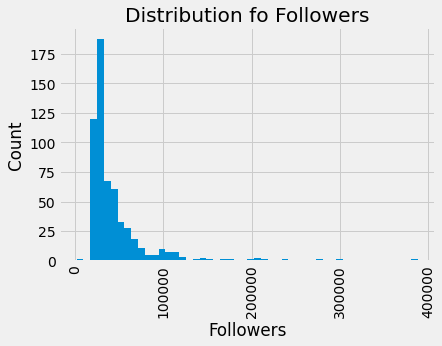

In [54]:
df.followers_count.hist(bins=50
                        , log = False
                       )
plt.xticks(rotation=90)
plt.title('Distribution fo Followers')
plt.ylabel('Count')
plt.xlabel('Followers');